In [1]:
# Package
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

allocine = pd.read_excel(r"C:\Users\maoui\OneDrive\Documents\Data Scientest\DTS - Projet\allocine_V1.xlsx")
allocine.head()

,ID,acteurs,genre,realisateur,scenariste,duree,date,annee,titre_original,note_presse,note_spectateurs,pays,distributeur,budget,titre,premiere_semaine_france,cumul_france,premiere_semaine_US,cumul_US,year
0,121,"Harrison Ford, Karen Allen, Paul Freeman, John...","Action, Aventure",Steven Spielberg,"Philip Kaufman, Lawrence Kasdan, George Lucas",116.0,1981-09-16 00:00:00,1981.0,Raiders of the Lost Ark,4.6,4.4,U.S.A.,CIC,22 000 000 $,Les Aventuriers de l'Arche perdue,NaN,NaN,1673731.0,1673731.0,2012.0
1,1317,"Aymeric Cormerais, Jean-Jacques Le Vessier, Ga...",Comédie dramatique,Yvon Marciano,Yvon Marciano,103.0,2009-10-07 00:00:00,2009.0,NaN,1.9,2.2,France,Colifilms Diffusion,NaN,Vivre !,3012.0,3364.0,NaN,NaN,2009.0
2,2133,"Tom Cruise, Kelly McGillis, Tom Skerritt, Val ...","Action, Drame, Romance",Tony Scott,"Jim Cash, Jack Epps Jr.",110.0,1986-09-17 00:00:00,1986.0,NaN,2.8,3.1,U.S.A.,Splendor Films,15 000 000 $,Top Gun,NaN,NaN,1900000.0,1900000.0,2013.0
3,2314,"Anna Ciepielewska, Aleksandra Slaska, Jan Krec...",Drame,"Andrzej Munk, Witold Lesiewicz","Zofia Posmysz, Andrzej Munk, Zofia Posmysz",62.0,1964-10-28 00:00:00,1964.0,Pasazerka,4.6,3.6,Pologne,Malavida Films,NaN,La Passagère,1420.0,2640.0,NaN,NaN,2023.0
4,3239,"Marie Ault, Arthur Chesney, Reginald Gardiner,...","Policier, Drame",Alfred Hitchcock,"Eliot Stannard, Alfred Hitchcock, Marie Belloc...",79.0,2010-11-17 00:00:00,2010.0,NaN,5.0,4.0,Grande-Bretagne,Carlotta Films,NaN,The Lodger: A Story of the London Fog,615.0,1084.0,NaN,NaN,2010.0


In [2]:
# Je retire les lignes qui n'ont pas de titre et pas de date
allocine = allocine.dropna(subset=['titre','date'])

In [3]:
# Convertir la colonne 'date' en format datetime
allocine['date'] = pd.to_datetime(allocine['date'], format='%Y-%m-%d', errors='coerce')

allocine.dtypes

ID                                  int64
acteurs                            object
genre                              object
realisateur                        object
scenariste                         object
duree                             float64
date                       datetime64[ns]
annee                             float64
titre_original                     object
note_presse                       float64
note_spectateurs                  float64
pays                               object
distributeur                       object
budget                             object
titre                              object
premiere_semaine_france           float64
cumul_france                      float64
premiere_semaine_US               float64
cumul_US                          float64
year                              float64
dtype: object

In [4]:
# Créer les nouvelles colonnes 'realease_year', 'release_month', 'release_day'
allocine.loc[:, 'release_year'] = allocine['date'].dt.year
allocine.loc[:, 'release_month'] = allocine['date'].dt.month
allocine.loc[:, 'release_day'] = allocine['date'].dt.day

allocine.head()

,ID,acteurs,genre,realisateur,scenariste,duree,date,annee,titre_original,note_presse,...,budget,titre,premiere_semaine_france,cumul_france,premiere_semaine_US,cumul_US,year,release_year,release_month,release_day
0,121,"Harrison Ford, Karen Allen, Paul Freeman, John...","Action, Aventure",Steven Spielberg,"Philip Kaufman, Lawrence Kasdan, George Lucas",116.0,1981-09-16,1981.0,Raiders of the Lost Ark,4.6,...,22 000 000 $,Les Aventuriers de l'Arche perdue,NaN,NaN,1673731.0,1673731.0,2012.0,1981.0,9.0,16.0
1,1317,"Aymeric Cormerais, Jean-Jacques Le Vessier, Ga...",Comédie dramatique,Yvon Marciano,Yvon Marciano,103.0,2009-10-07,2009.0,NaN,1.9,...,NaN,Vivre !,3012.0,3364.0,NaN,NaN,2009.0,2009.0,10.0,7.0
2,2133,"Tom Cruise, Kelly McGillis, Tom Skerritt, Val ...","Action, Drame, Romance",Tony Scott,"Jim Cash, Jack Epps Jr.",110.0,1986-09-17,1986.0,NaN,2.8,...,15 000 000 $,Top Gun,NaN,NaN,1900000.0,1900000.0,2013.0,1986.0,9.0,17.0
3,2314,"Anna Ciepielewska, Aleksandra Slaska, Jan Krec...",Drame,"Andrzej Munk, Witold Lesiewicz","Zofia Posmysz, Andrzej Munk, Zofia Posmysz",62.0,1964-10-28,1964.0,Pasazerka,4.6,...,NaN,La Passagère,1420.0,2640.0,NaN,NaN,2023.0,1964.0,10.0,28.0
4,3239,"Marie Ault, Arthur Chesney, Reginald Gardiner,...","Policier, Drame",Alfred Hitchcock,"Eliot Stannard, Alfred Hitchcock, Marie Belloc...",79.0,2010-11-17,2010.0,NaN,5.0,...,NaN,The Lodger: A Story of the London Fog,615.0,1084.0,NaN,NaN,2010.0,2010.0,11.0,17.0


In [5]:
# Suite à cette transformation, je retire les lignes qui ont des dates en NA
allocine = allocine.dropna(subset=['date'])

In [6]:
allocine['release_year'] = allocine['release_year'].astype(int)
allocine['release_month'] = allocine['release_month'].astype(int)
allocine['release_day'] = allocine['release_day'].astype(int)

allocine.dtypes

ID                                  int64
acteurs                            object
genre                              object
realisateur                        object
scenariste                         object
duree                             float64
date                       datetime64[ns]
annee                             float64
titre_original                     object
note_presse                       float64
note_spectateurs                  float64
pays                               object
distributeur                       object
budget                             object
titre                              object
premiere_semaine_france           float64
cumul_france                      float64
premiere_semaine_US               float64
cumul_US                          float64
year                              float64
release_year                        int32
release_month                       int32
release_day                         int32
dtype: object

In [7]:
allocine.shape

(11827, 23)

In [8]:
# On regarde si on peut remplacer les NA de la colonne runtime_x par une moyenne ou une mediane
allocine['duree'].describe()

count    11669.000000
mean       101.316480
std         21.189459
min         24.000000
25%         90.000000
50%         99.000000
75%        110.000000
max        543.000000
Name: duree, dtype: float64

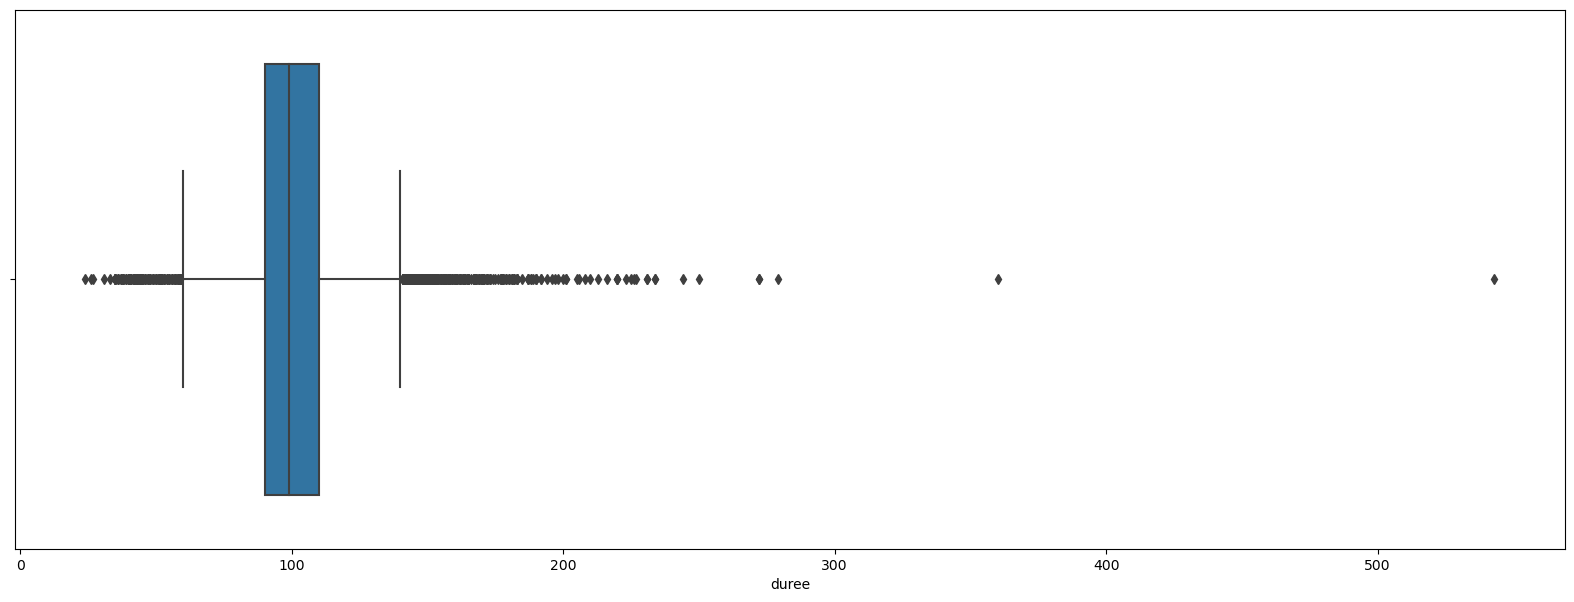

In [9]:
# La médiane et la moyenne sont assez proches (101 pour la moyenne et 99 pour la médiane). On décide de réaliser un boxplot pour mieux visualiser.

import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

plt.figure( figsize= (20, 7))
sns.boxplot(x = allocine['duree']);

In [10]:
 # On regarde quel est le film durant 543 min (correspond au max de la colonne duree) pour voir s'il s'agit d'une erreur
films_avec_duree_max = allocine[allocine['duree'] == 543 ]
print(films_avec_duree_max['titre'])

2849    Death in the Land of Encantos
Name: titre, dtype: object


In [11]:
# Le film philippin Death in the Land of Encantos dure bien 543 minutes et est sorti en 2007.

In [12]:
# On va vérifier les durées pour les 10 films les plus longs
# Trier le DataFrame par la colonne 'runtime_x' de manière décroissante
allocine_sorted = allocine.sort_values(by='duree', ascending=False)

# Afficher les 10 premières lignes (les plus grandes durées) avec la colonne 'title'
top_10_films = allocine_sorted.head(10)[['titre', 'duree']]

print("Les 10 films les plus longs:")
print(top_10_films)

Les 10 films les plus longs:
                               titre  duree
2849   Death in the Land of Encantos  543.0
3818         La République Marseille  360.0
10652                          Halte  279.0
11237                      City Hall  272.0
4372            Mystères de Lisbonne  272.0
6485     Norte, la fin de l'histoire  250.0
6727                     At Berkeley  244.0
9805       An Elephant Sitting Still  234.0
9755             La Saison du diable  234.0
6743         HEIMAT II â€“ Lâ€™exode  231.0


In [13]:
# Tous ces films existent bien et les durées sont correctes. Ce ne sont donc pas des valeurs aberrantes.

In [14]:
# On va maintenant remplacer les valeurs manquantes de la durée par la médiane car le nombre important de valeurs extrêmes influences nécessairement plus la moyenne.
median_duree = allocine['duree'].median()
allocine['duree'].fillna(median_duree, inplace=True)

In [15]:
# Vérification de l'absences de valeurs manquantes pour la colonne duree
allocine.isna().sum()

ID                            0
acteurs                    1766
genre                       122
realisateur                 143
scenariste                  932
duree                         0
date                          0
annee                         0
titre_original             7487
note_presse                  46
note_spectateurs           1256
pays                         10
distributeur                605
budget                     8557
titre                         0
premiere_semaine_france     818
cumul_france                820
premiere_semaine_US        8636
cumul_US                   8720
year                          0
release_year                  0
release_month                 0
release_day                   0
dtype: int64

In [16]:
# On refait un describe
allocine['duree'].describe()

count    11827.000000
mean       101.285533
std         21.049113
min         24.000000
25%         90.000000
50%         99.000000
75%        110.000000
max        543.000000
Name: duree, dtype: float64

In [17]:
# Un film sorti en France dure donc en moyenne 1h41.

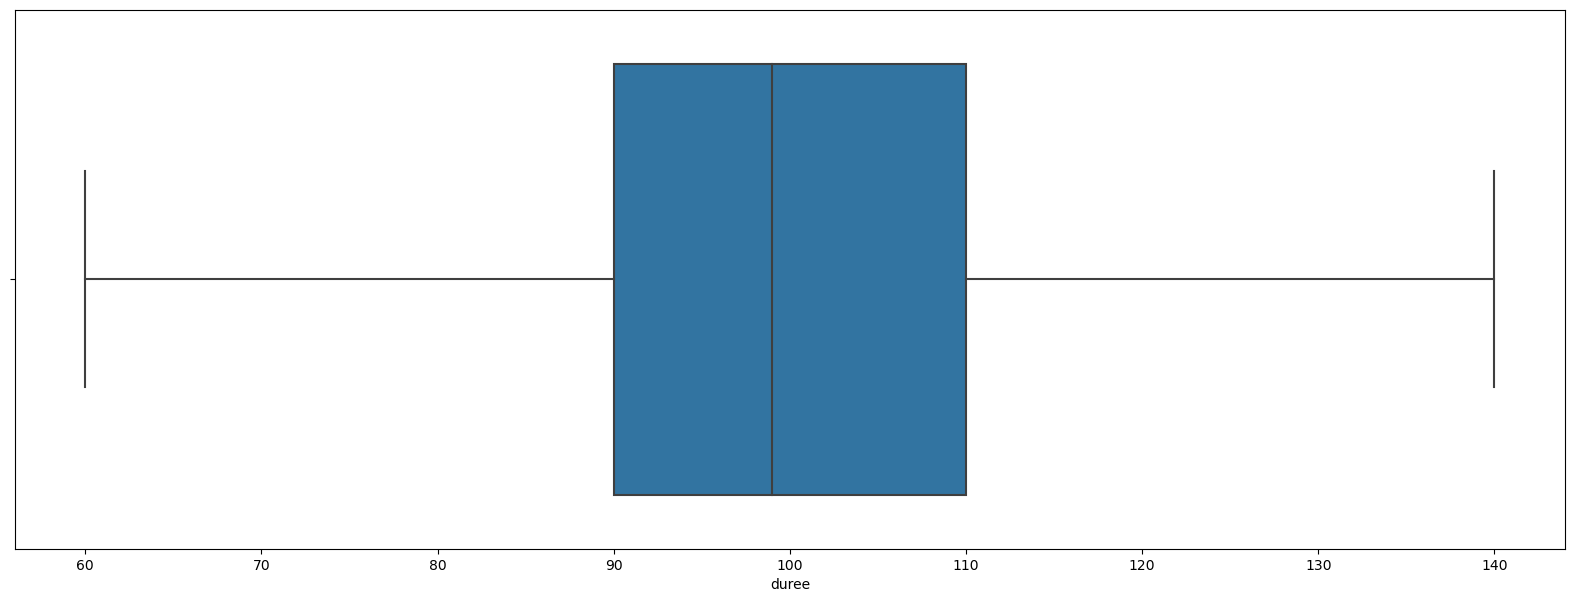

In [18]:
# Nouveau Boxplot en ignorant les valeurs extrêmes
plt.figure( figsize= (20, 7))
sns.boxplot(x = allocine['duree'], showfliers=False);

In [19]:
# Evolution des durées moyennes de films par an

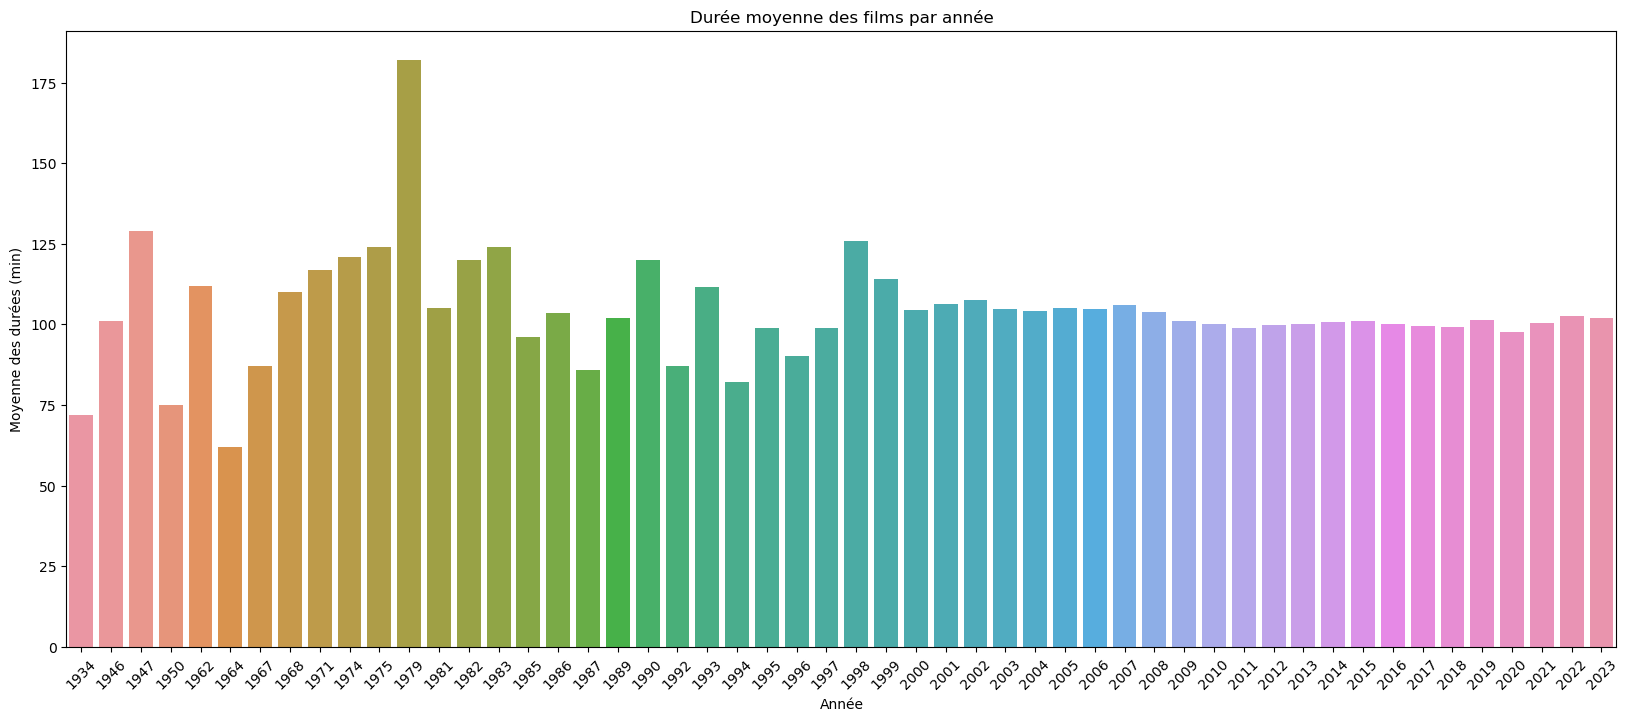

In [20]:
# On groupe les films par années
grouped = allocine.groupby('release_year')

# Calcul la durée moyenne des films pour chaque année
avg_runtime_by_year = grouped['duree'].mean()

# Réalisation d'un nouveau dataframe
allocine_avg_runtime_by_year = avg_runtime_by_year.reset_index()
allocine_avg_runtime_by_year.columns = ['release_year', 'avg_runtime']

# Classement du dataframe par années (de la plus ancienne à la plus récente)
allocine_avg_runtime_by_year = allocine_avg_runtime_by_year.sort_values('release_year', ascending=False)

# Exclusion des années après 2023
allocine_avg_runtime_by_year_excl = allocine_avg_runtime_by_year[~allocine_avg_runtime_by_year['release_year'].isin([2024])]

# Création du graphique : durée moyenne des films par année
fig, ax = plt.subplots(figsize=(20, 8))
plot = sns.barplot(x='release_year', y=allocine_avg_runtime_by_year_excl['avg_runtime'], data=allocine_avg_runtime_by_year_excl, ax=ax)

# set the title and axis labels
ax.set_title('Durée moyenne des films par année')
ax.set_xlabel('Année')
ax.set_ylabel('Moyenne des durées (min)')

# Rotation de l'axe des abscisses pour plus de visibilité
plt.xticks(rotation=45)

# Affichage
plt.show()

In [21]:
# On observe une tendance de durée moyenne plus élevée dans les années 70, puis une légère baisse. A partir des années 2000, la durée moyenne par an se stabilise autour de la durrée moyenne globale.

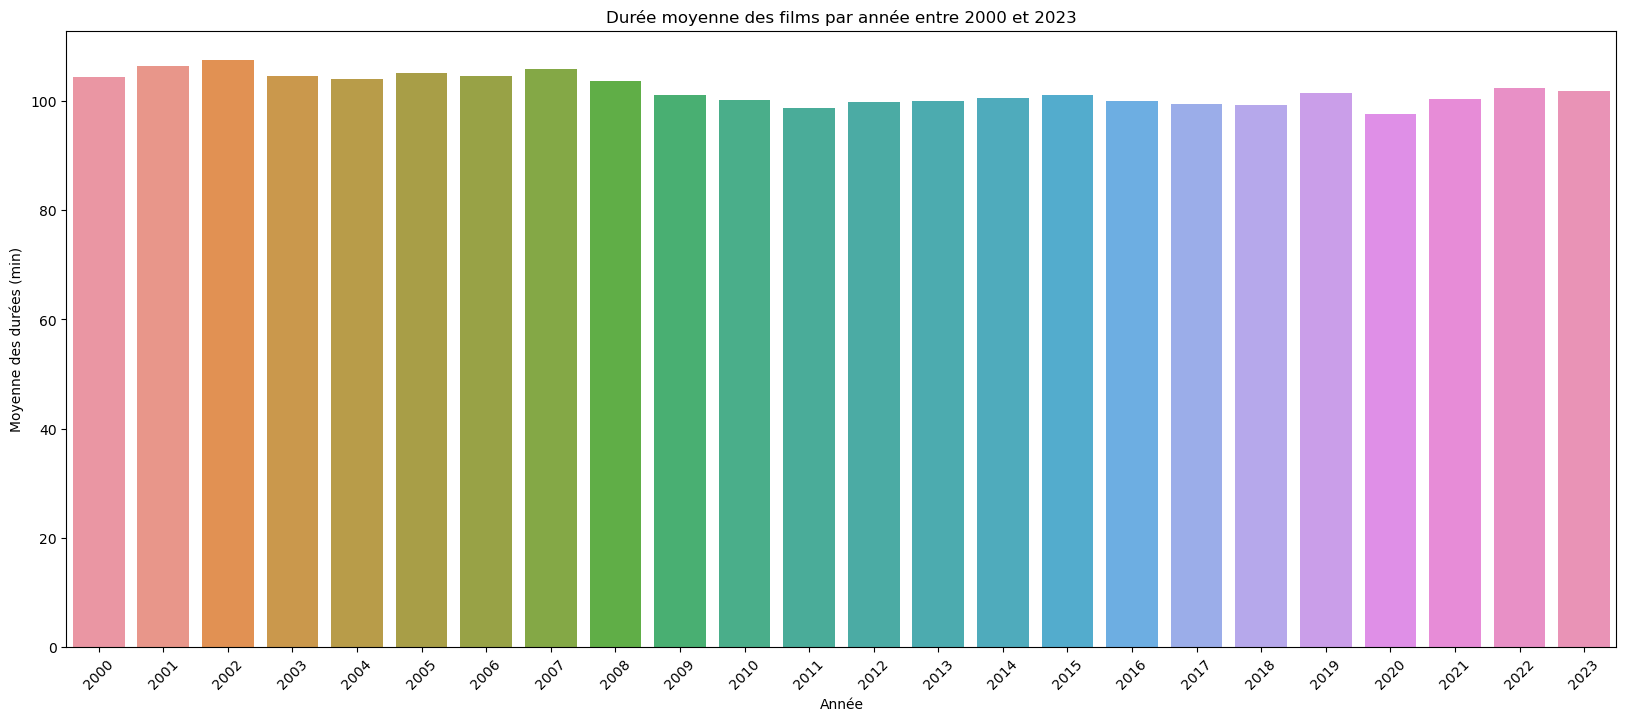

In [22]:
# Focus sur les années 2000

# Sélection des années
from2000_to_2023 = allocine_avg_runtime_by_year_excl.sort_values('release_year', ascending=False).head(24)

# Création du graphique : durée moyenne des films par année
fig, ax = plt.subplots(figsize=(20, 8))
plot_2 = sns.barplot(x='release_year', y=from2000_to_2023['avg_runtime'], data=from2000_to_2023, ax=ax)

# set the title and axis labels
ax.set_title('Durée moyenne des films par année entre 2000 et 2023')
ax.set_xlabel('Année')
ax.set_ylabel('Moyenne des durées (min)')

# Rotation de l'axe des abscisses pour plus de visibilité
plt.xticks(rotation=45)

# Affichage
plt.show()

In [23]:
# Les films sortis en 2000 semblent avoir une durée moyenne très légèrement supérieure aux films sortis dans les années 2010.

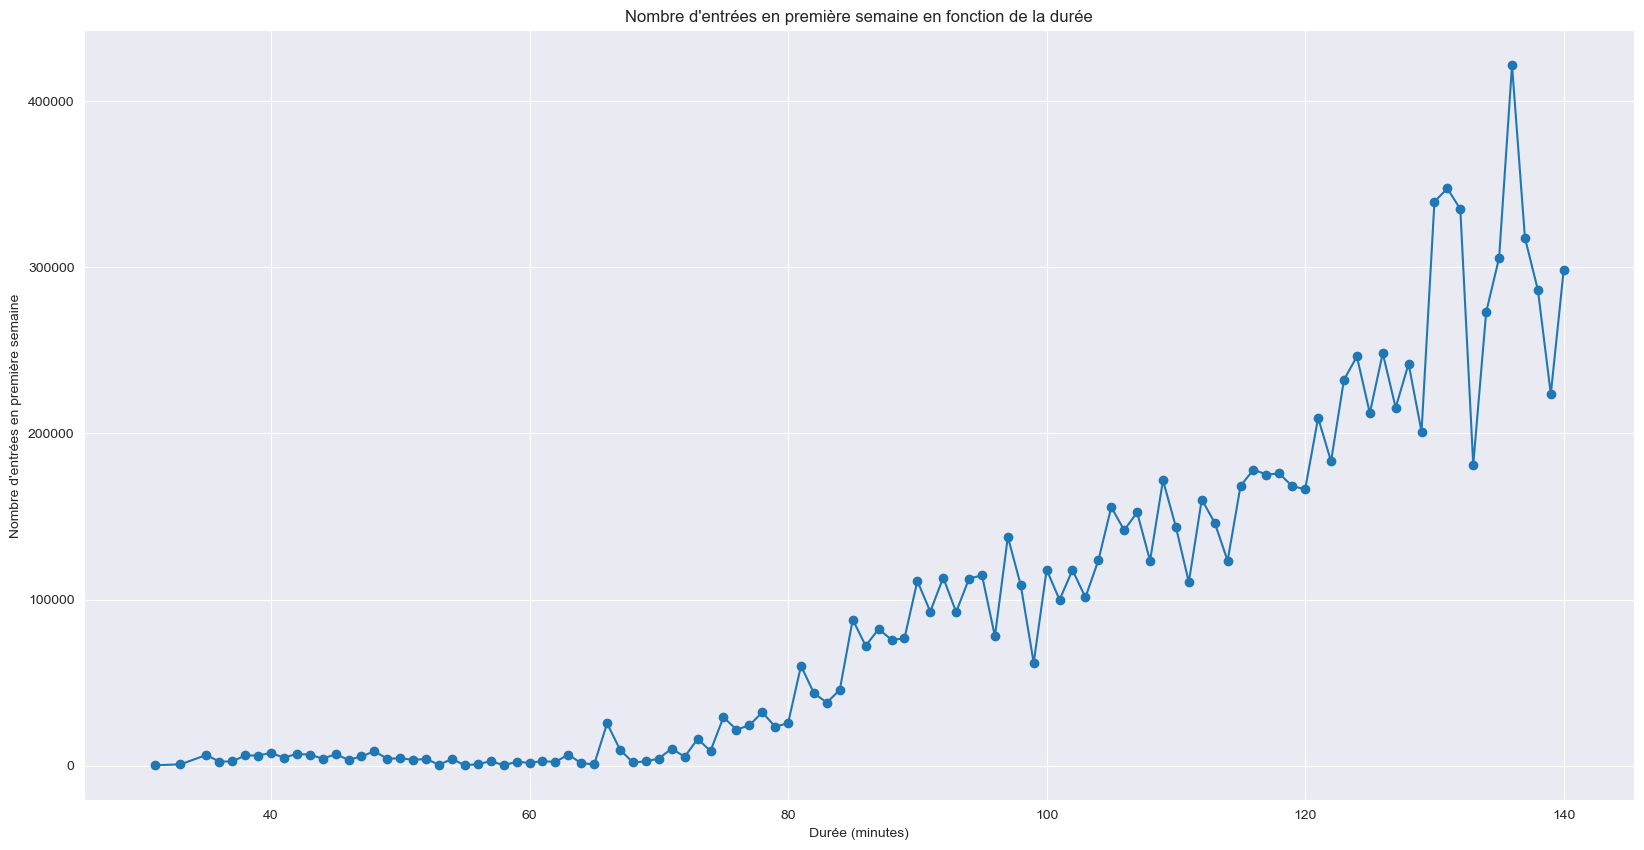

In [24]:
# Relation entre durée d'un film et son revenu box_office France (première semaine)

# Style du graphique
sns.set_style('darkgrid')

# Filtrer les films avec un revenu supérieur à 0 et une durée entre 30 et 140 minutes
allocine_rev = allocine[(allocine['premiere_semaine_france'] > 0) & (allocine['duree'] >= 30) & (allocine['duree'] <= 140)]

# Calcul de la moyenne du revenu pour chaque valeur de runtime_x
average_bo_france_by_duration = allocine_rev.groupby('duree')['premiere_semaine_france'].mean().reset_index()

# Création du graphique en courbe
plt.figure(figsize=(20, 10))
plt.plot(average_bo_france_by_duration['duree'], average_bo_france_by_duration['premiere_semaine_france'], marker='o')

# Nom des axes
plt.xlabel('Durée (minutes)')
plt.ylabel("Nombre d'entrées en première semaine")

# Titre du graphique
plt.title("Nombre d'entrées en première semaine en fonction de la durée")

# Affichage
plt.show()

In [37]:
# On observe que plus un film dure longtemps, plus son nombre d'entrées en première semaine est élevé.

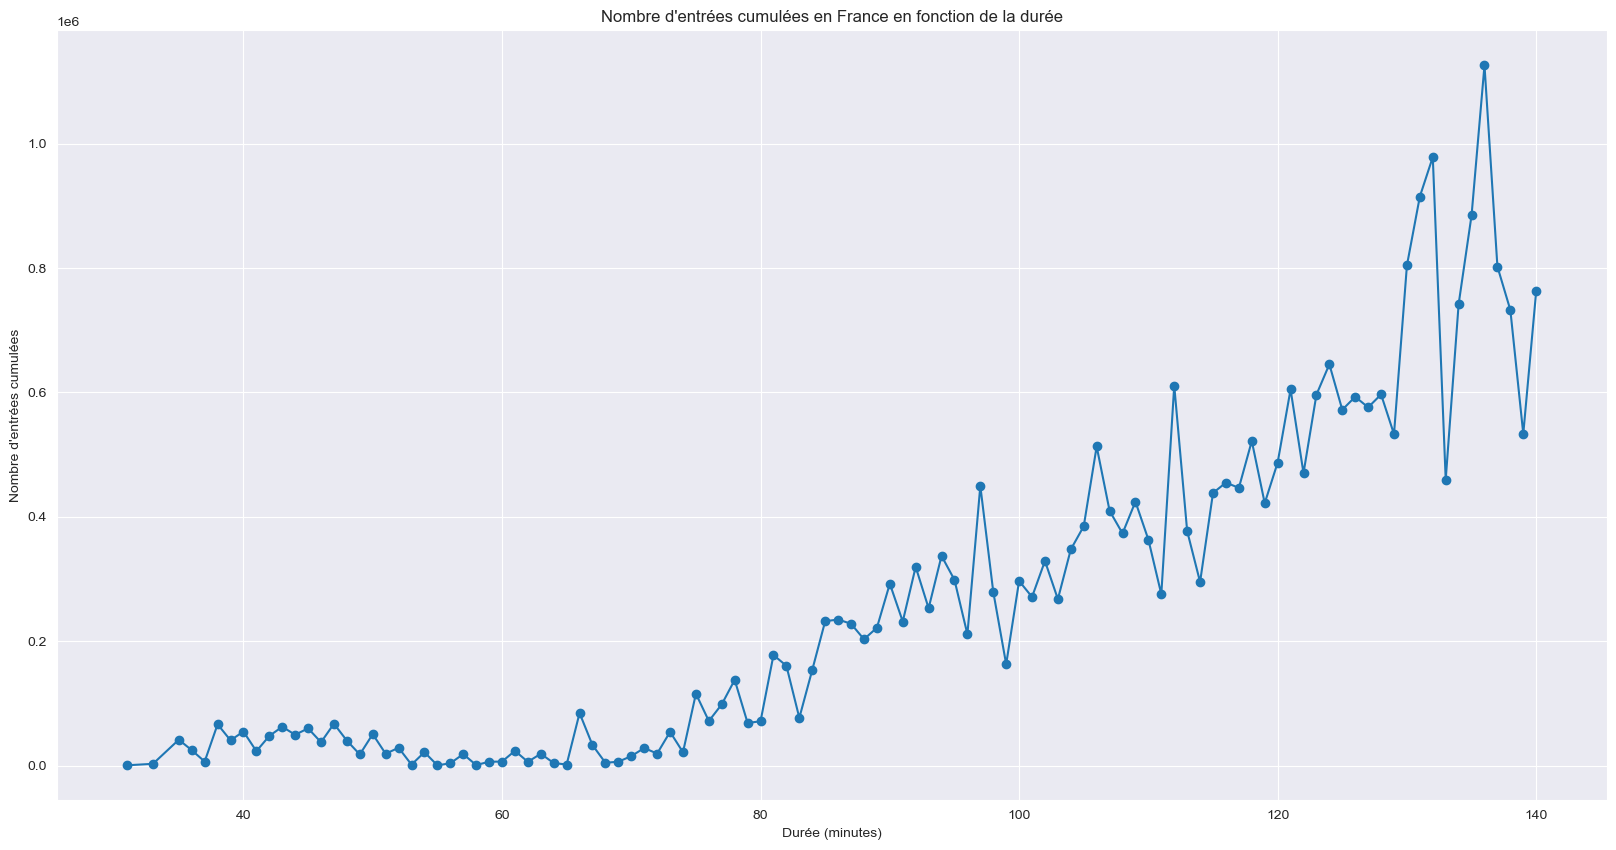

In [26]:
# Relation entre durée d'un film et son revenu box_office France (cumulé)

# Style du graphique
sns.set_style('darkgrid')

# Filtrer les films avec un revenu supérieur à 0 et une durée entre 30 et 140 minutes
allocine_cumul = allocine[(allocine['cumul_france'] > 0) & (allocine['duree'] >= 30) & (allocine['duree'] <= 140)]

# Calcul de la moyenne du revenu pour chaque valeur de runtime_x
average_cumul_france_by_duration = allocine_cumul.groupby('duree')['cumul_france'].mean().reset_index()

# Création du graphique en courbe
plt.figure(figsize=(20, 10))
plt.plot(average_cumul_france_by_duration['duree'], average_cumul_france_by_duration['cumul_france'], marker='o')

# Nom des axes
plt.xlabel('Durée (minutes)')
plt.ylabel("Nombre d'entrées cumulées")

# Titre du graphique
plt.title("Nombre d'entrées cumulées en France en fonction de la durée")

# Affichage
plt.show();

In [40]:
# On observe que plus un film dure longtemps, plus son nombre d'entrées cumulées en France est élevé.

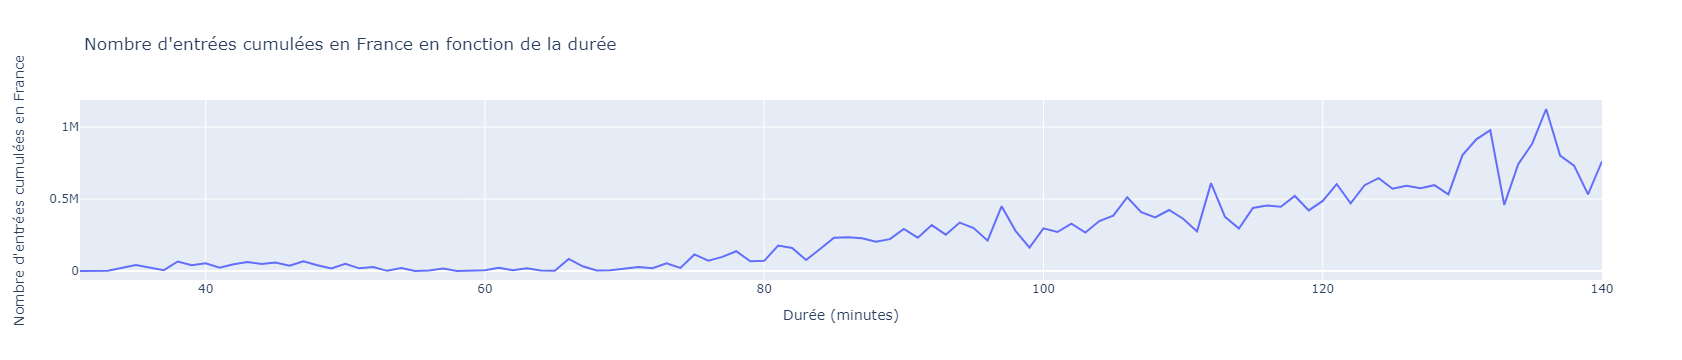

In [45]:
# Même graphique avec Plotly
import plotly.express as px

# Calcul de la moyenne du revenu pour chaque valeur de runtime_x
average_cumul_france_by_duration = allocine_cumul.groupby('duree')['cumul_france'].mean().reset_index()

# Création du graphique en courbe avec Plotly Express
fig = px.line(average_cumul_france_by_duration, x='duree', y='cumul_france', 
              title="Nombre d'entrées cumulées en France en fonction de la durée",
              labels={'duree': 'Durée (minutes)', 'cumul_france': "Nombre d'entrées cumulées en France"})

# Affichage du graphique
fig.show()

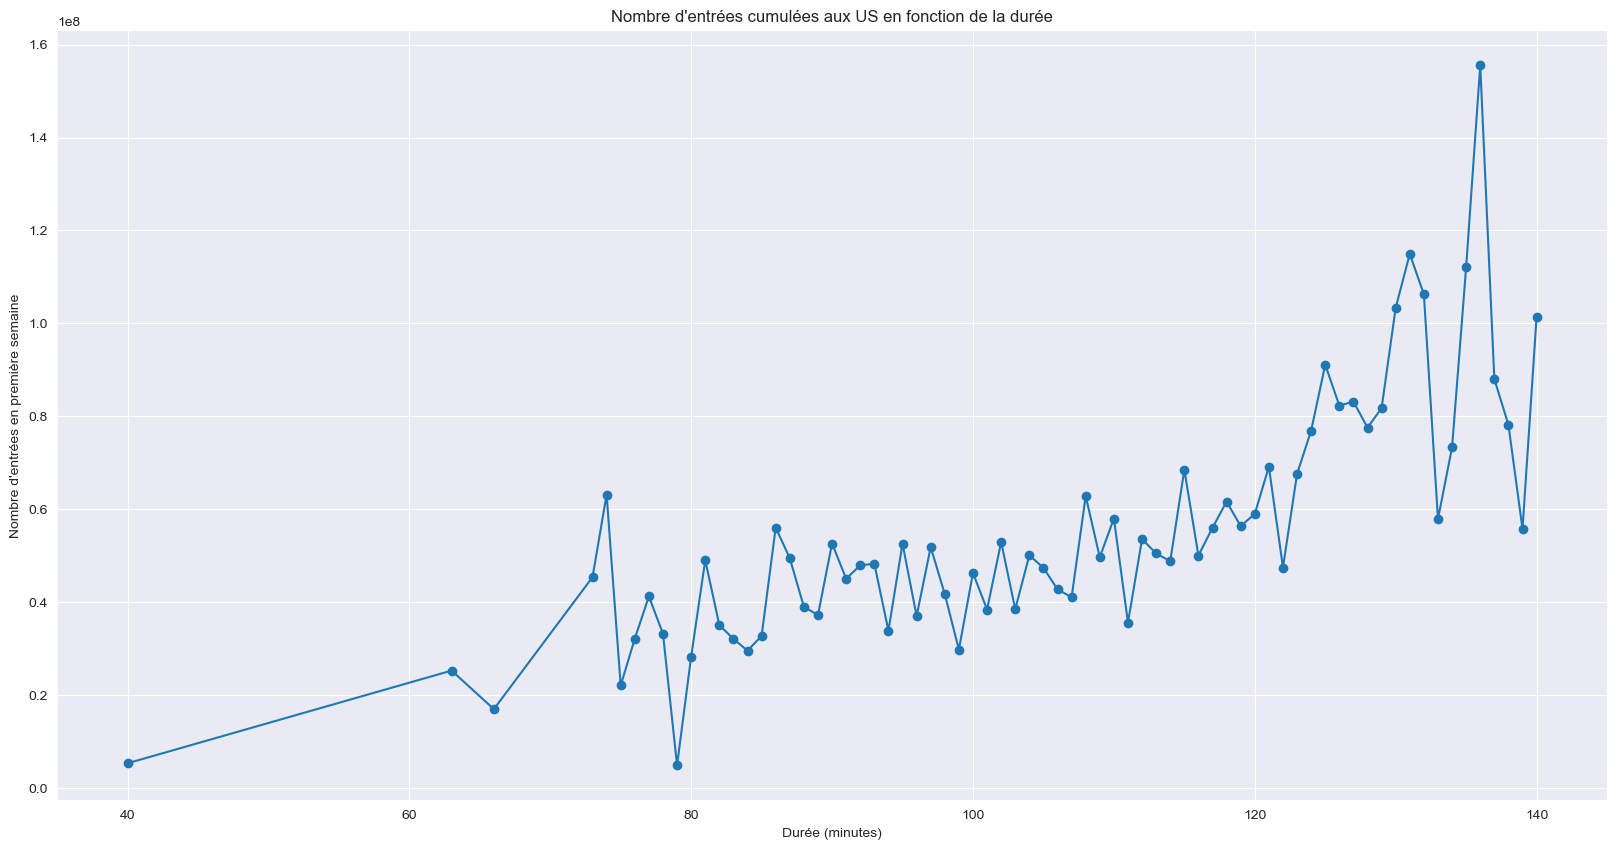

In [42]:
# Relation entre durée d'un film et son revenu box_office US (cumulé)

# Style du graphique
sns.set_style('darkgrid')

# Filtrer les films avec un revenu supérieur à 0 et une durée entre 30 et 140 minutes
allocine_cumul_US = allocine[(allocine['cumul_US'] > 0) & (allocine['duree'] >= 30) & (allocine['duree'] <= 140)]

# Calcul de la moyenne du revenu pour chaque valeur de runtime_x
average_cumul_US_by_duration = allocine_cumul_US.groupby('duree')['cumul_US'].mean().reset_index()

# Création du graphique en courbe
plt.figure(figsize=(20, 10))
plt.plot(average_cumul_US_by_duration['duree'], average_cumul_US_by_duration['cumul_US'], marker='o')

# Nom des axes
plt.xlabel('Durée (minutes)')
plt.ylabel("Nombre d'entrées en première semaine")

# Titre du graphique
plt.title("Nombre d'entrées cumulées aux US en fonction de la durée")

# Affichage
plt.show()

In [ ]:
# Nous avons moins de datas, mais on observe, comme pour la France, que plus un film dure longtemps, plus son nombre d'entrées cumulées aux US est élevé.